<a href="https://colab.research.google.com/github/XiaoLiang28/Datamanagement/blob/main/PS6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up

In [1]:
#---------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

# Data Import

In [4]:
hdiG=pd.read_excel("https://github.com/XiaoLiang28/Datamanagement/raw/main/hdiG.xlsx")
hdiG.head()

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,Human Development,GII Value,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Population with at least some secondary education female,Population with at least some secondary education male,Labour force participation rate female,Labour force participation rate male,_merge,GDI
0,1,Switzerland,0.962,83.9872,16.500299,13.85966,66933.00454,Very High,0.018,5.0,2.212,39.837398,96.858673,97.533417,61.728,72.705,both,0.97
1,2,Norway,0.961,83.2339,18.185200,13.00363,64660.10622,Very High,0.016,2.0,2.336,44.970414,99.094223,99.283562,60.294,71.950,both,0.98
2,3,Iceland,0.959,82.6782,19.163059,13.76717,55782.04981,Very High,0.043,4.0,5.395,47.619048,99.768417,99.662552,61.671,70.463,both,0.98
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.22621,62606.84540,Very High,NaN,NaN,1.584,NaN,77.100433,83.368141,53.524,65.771,both,0.98
4,5,Australia,0.951,84.5265,21.054590,12.72682,49238.43335,Very High,0.073,6.0,8.096,37.885463,94.580063,94.430069,61.057,70.547,both,0.97


In [18]:
hdiG.rename(columns={'Gross national income (GNI) per capita':'GNI', 'Population with at least some secondary education female':'secondaryF',
            'Population with at least some secondary education male':'secondaryM','Human Development Index (HDI) ':'HDI',
             'Labour force participation rate female':'labourF','Labour force participation rate male':'labourM' },inplace=True)

# General Description

In [21]:
hdiG.shape

(172, 18)

In [19]:
hdiG.describe()

,HDI Rank,HDI,Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI,GII Value,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,secondaryF,secondaryM,labourF,labourM,GDI
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,169.000000,171.000000,172.000000,170.000000,171.000000,171.000000,172.000000,172.000000,172.000000
mean,95.110465,0.722326,71.344390,13.663146,8.994990,19991.534690,0.344467,157.614035,44.772994,25.282256,62.053826,66.516562,49.980453,69.878866,0.947506
std,56.151159,0.153346,7.790225,2.912409,3.239057,20220.758854,0.197687,233.658405,39.021278,12.363217,29.737575,26.637432,15.443528,8.512194,0.065949
min,1.000000,0.385000,52.525400,5.542510,2.114962,731.786709,0.013000,2.000000,1.584000,0.000000,6.395730,13.046886,5.995000,43.932000,0.496000
25%,46.750000,0.596000,65.672950,11.926486,6.203200,4609.355030,0.177000,11.500000,10.500000,16.666667,36.980984,44.433405,42.388000,65.127250,0.920750
50%,95.500000,0.739500,71.977150,13.694028,9.429850,12327.813500,0.364000,46.000000,35.461500,23.943966,68.897713,70.658863,51.980500,69.157500,0.970000
75%,144.500000,0.843000,76.957800,15.729518,11.610201,30271.837485,0.506000,185.500000,65.115250,34.533223,90.011884,92.449715,59.800500,75.351250,0.990000
max,191.000000,0.962000,85.473400,21.054590,14.090967,90918.644710,0.820000,1150.000000,170.462000,55.660377,100.000000,100.000000,82.501000,95.456000,1.030000


In [20]:
hdiG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HDI Rank                      172 non-null    int64  
 1   Country                       172 non-null    object 
 2   HDI                           172 non-null    float64
 3   Life expectancy at birth      172 non-null    float64
 4   Expected years of schooling   172 non-null    float64
 5   Mean years of schooling       172 non-null    float64
 6   GNI                           172 non-null    float64
 7   Human Development             172 non-null    object 
 8   GII Value                     169 non-null    float64
 9   Maternal mortality ratio      171 non-null    float64
 10  Adolescent birth rate         172 non-null    float64
 11  Share of seats in parliament  170 non-null    float64
 12  secondaryF                    171 non-null    float64
 13  secon

array([[<Axes: title={'center': 'HDI Rank'}>,
        <Axes: title={'center': 'HDI'}>,
        <Axes: title={'center': 'Life expectancy at birth'}>,
        <Axes: title={'center': 'Expected years of schooling'}>],
       [<Axes: title={'center': 'Mean years of schooling'}>,
        <Axes: title={'center': 'GNI'}>,
        <Axes: title={'center': 'GII Value'}>,
        <Axes: title={'center': 'Maternal mortality ratio'}>],
       [<Axes: title={'center': 'Adolescent birth rate'}>,
        <Axes: title={'center': 'Share of seats in parliament'}>,
        <Axes: title={'center': 'secondaryF'}>,
        <Axes: title={'center': 'secondaryM'}>],
       [<Axes: title={'center': 'labourF'}>,
        <Axes: title={'center': 'labourM'}>,
        <Axes: title={'center': 'GDI'}>, <Axes: >]], dtype=object)

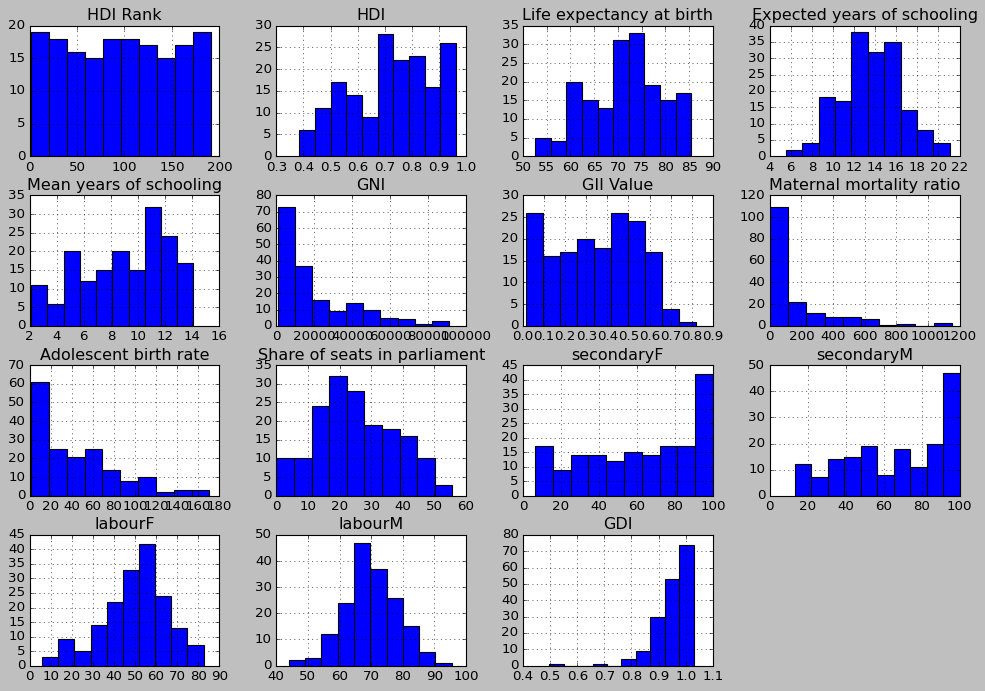

In [22]:
hdiG.hist(figsize=(15,10))

# Data Analysis

In [23]:
variables = ['Life expectancy at birth', 'Expected years of schooling', 'Mean years of schooling', 'GNI','Maternal mortality ratio','Adolescent birth rate','Share of seats in parliament',
            'secondaryF','secondaryM','labourF','labourM' ]

In [24]:
std_dev = hdiG[variables].std()

In [25]:
std_dev

Life expectancy at birth            7.790225
Expected years of schooling         2.912409
Mean years of schooling             3.239057
GNI                             20220.758854
Maternal mortality ratio          233.658405
Adolescent birth rate              39.021278
Share of seats in parliament       12.363217
secondaryF                         29.737575
secondaryM                         26.637432
labourF                            15.443528
labourM                             8.512194
dtype: float64

In [26]:
import statsmodels.api as sm

In [27]:
dependent = 'HDI'
independent = hdiG[['Maternal mortality ratio', 'Adolescent birth rate', 'Share of seats in parliament',
                    'secondaryF','secondaryM','labourF','labourM']]

In [29]:
hdiG1=hdiG.dropna()

In [31]:
x = hdiG1[dependent]
result = sm.OLS(x, independent).fit()
print(result.summary())

MissingDataError: ignored